Here we will build a Polynomial regression model to predict the previous salaries of a given candidate

# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Here we won't be splitting our dataset into training and test set because the list is small and we need all the data to train our PLR model.

'Level' will be our matrix of features and 'Salary' will be our dependent variable vector. 

No need to encode the features. NO need for feature scaling either!

We will compare a Linear regression model with a polynomial regression model

# Training the Linear Regression model on the whole datatset 

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

# Training the Polynomial Regression model on the whole datatset

 Now we will first build a MLR model. Create a matrix of features
 x_poly which has x1^2 in place of x2, x1^3 in place of x3
 and so on which is done by importing a class called PolynomialFeatures
 

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)

If we chose degree = 2, x will be transformed into b0 +b1x + b2 x^2 

Now we have to train the linear regression model on the new feature matrix x_poly

In [18]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

## Vizualizing Linear Regression results

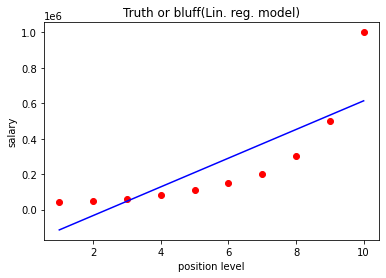

In [21]:
plt.scatter(x, y, c = 'red')
plt.plot(x, lin_reg.predict(x), c = 'blue')
plt.title('Truth or bluff(Lin. reg. model)')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

Clearly the Linear regression model is not well adapted for the given data!! 

## Vizualizing Polynomial Regression results

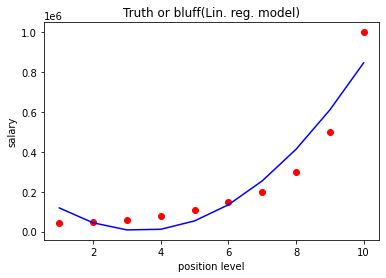

In [23]:
plt.scatter(x, y, c = 'red')
plt.plot(x, lin_reg_2.predict(x_poly), c = 'blue')
plt.title('Truth or bluff(Lin. reg. model)')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

This is much closer to the observed datapoints!! And this is only with n(degree) = 2!!

For degree = 4, the model will be as follows: 

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

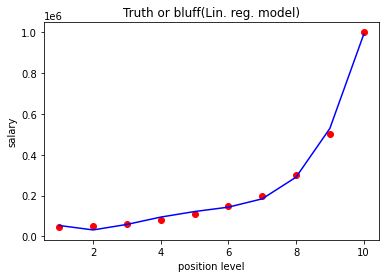

In [26]:
plt.scatter(x, y, c = 'red')
plt.plot(x, lin_reg_2.predict(x_poly), c = 'blue')
plt.title('Truth or bluff(Lin. reg. model)')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

## Vizualizing Polynomial Regression results(for higher resolution and smoother curve)

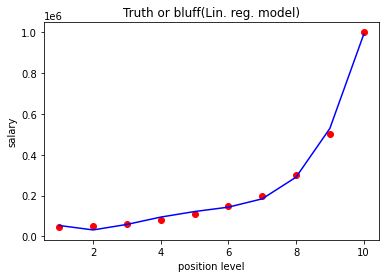

In [28]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, c = 'red')
plt.plot(x, lin_reg_2.predict(x_poly), c = 'blue')
plt.title('Truth or bluff(Lin. reg. model)')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

# Predicting new new result with linear regression 

In [31]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting new new result with polynomial regression

In [33]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265158])